作业：从零开始构建三层神经网络分类器，实现图像分类
任务描述：
手工搭建三层神经网络分类器，在数据集 CIFAR-10 上进行训练以实现图像分类。
基本要求：
（1） 本次作业要求自主实现反向传播，不允许使用 pytorch，tensorflow 等现成的支持自动微分的深度学习框架，可以使用 numpy；
（2） 最终提交的代码中应至少包含模型、训练、测试和参数查找四个部分，鼓励进行模块化设计；
（3） 其中模型部分应允许自定义隐藏层大小、激活函数类型，支持通过反向传播计算给定损失的梯度；
训练部分应实现 SGD 优化器、学习率下降、交叉熵损失和 L2 正则化，并能根据验证集指标自动保存最优的模型权重；
参数查找环节要求调节学习率、隐藏层大小、正则化强度等超参数，观察并记录模型在不同超参数下的性能；
测试部分需支持导入训练好的模型，输出在测试集上的分类准确率（Accuracy）。
提交要求：
（1） 仅提交 pdf 格式的实验报告，报告中除对模型、数据集和实验结果的基本介绍外，还应可视化训练过程中在训练集和验证集上的 loss 曲线和验证集上的 accuracy 曲线；
（2） 报告中需包含对训练好的模型网络参数的可视化，并观察其中的模式；
（3） 代码提交到自己的 public github repo，repo 的 readme 中应清晰指明如何进行训练和测试，训练好的模型权重上传到百度云 /google drive 等网盘，实验报告内应包含实验代码所在的 github repo 链接及模型权重的下载地址。

In [2]:
from data_loader import load_cifar10_data
from model import NeuralNetwork
from trainer import Trainer

# 加载数据
X_train_full, y_train_full, X_test, y_test = load_cifar10_data('cifar-10-batches-py')

# 划分验证集
val_size = 5000
X_val = X_train_full[:val_size]
y_val = y_train_full[:val_size]
X_train = X_train_full[val_size:]
y_train = y_train_full[val_size:]

# 设置超参数
model = NeuralNetwork(3072, 100, 10, activation='relu', reg_lambda=0.001)
trainer = Trainer(model, learning_rate=5.5e-4, batch_size=50, epochs=100)

# 训练
trainer.train(X_train, y_train, X_val, y_val)

# 测试
trainer.load_model('best_model.npy')
test_acc = trainer.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/100, Loss: 313.2144, Val Acc: 0.1270
Epoch 2/100, Loss: 313.2077, Val Acc: 0.1442
Epoch 3/100, Loss: 313.2042, Val Acc: 0.1790
Epoch 4/100, Loss: 313.1866, Val Acc: 0.2172
Epoch 5/100, Loss: 313.1527, Val Acc: 0.2308
Epoch 6/100, Loss: 313.0687, Val Acc: 0.2380
Epoch 7/100, Loss: 313.0715, Val Acc: 0.2640
Epoch 8/100, Loss: 313.0364, Val Acc: 0.2644
Epoch 9/100, Loss: 312.8864, Val Acc: 0.2820
Epoch 10/100, Loss: 312.9394, Val Acc: 0.2766
Epoch 11/100, Loss: 312.8736, Val Acc: 0.2884
Epoch 12/100, Loss: 313.0548, Val Acc: 0.2904
Epoch 13/100, Loss: 312.9170, Val Acc: 0.2990
Epoch 14/100, Loss: 312.8187, Val Acc: 0.3098
Epoch 15/100, Loss: 312.9355, Val Acc: 0.3096
Epoch 16/100, Loss: 313.0357, Val Acc: 0.3160
Epoch 17/100, Loss: 312.7880, Val Acc: 0.3170
Epoch 18/100, Loss: 312.8118, Val Acc: 0.3166
Epoch 19/100, Loss: 312.8022, Val Acc: 0.3236
Epoch 20/100, Loss: 312.7860, Val Acc: 0.3236
Epoch 21/100, Loss: 312.9405, Val Acc: 0.3234
Epoch 22/100, Loss: 312.8091, Val Acc: 0.32

Epoch 1/50, Loss: 312.8132, Val Acc: 0.2882
Epoch 2/50, Loss: 312.5901, Val Acc: 0.3264
Epoch 3/50, Loss: 312.6269, Val Acc: 0.3400
Epoch 4/50, Loss: 312.3278, Val Acc: 0.3762
Epoch 5/50, Loss: 312.5562, Val Acc: 0.3920
Epoch 6/50, Loss: 311.9240, Val Acc: 0.3936
Epoch 7/50, Loss: 312.3556, Val Acc: 0.4076
Epoch 8/50, Loss: 312.4407, Val Acc: 0.3882
Epoch 9/50, Loss: 312.1083, Val Acc: 0.4126
Epoch 10/50, Loss: 312.3536, Val Acc: 0.4096
Epoch 11/50, Loss: 312.1468, Val Acc: 0.4152
Epoch 12/50, Loss: 312.4397, Val Acc: 0.3834
Epoch 13/50, Loss: 312.2134, Val Acc: 0.3952
Epoch 14/50, Loss: 312.4477, Val Acc: 0.4404
Epoch 15/50, Loss: 312.7295, Val Acc: 0.4348
Epoch 16/50, Loss: 312.1798, Val Acc: 0.3964
Epoch 17/50, Loss: 311.9719, Val Acc: 0.4580
Epoch 18/50, Loss: 312.5278, Val Acc: 0.4360
Epoch 19/50, Loss: 312.0807, Val Acc: 0.4270
Epoch 20/50, Loss: 313.2184, Val Acc: 0.3804
Epoch 21/50, Loss: 312.5039, Val Acc: 0.4902
Epoch 22/50, Loss: 312.4546, Val Acc: 0.4892
Epoch 23/50, Loss: 

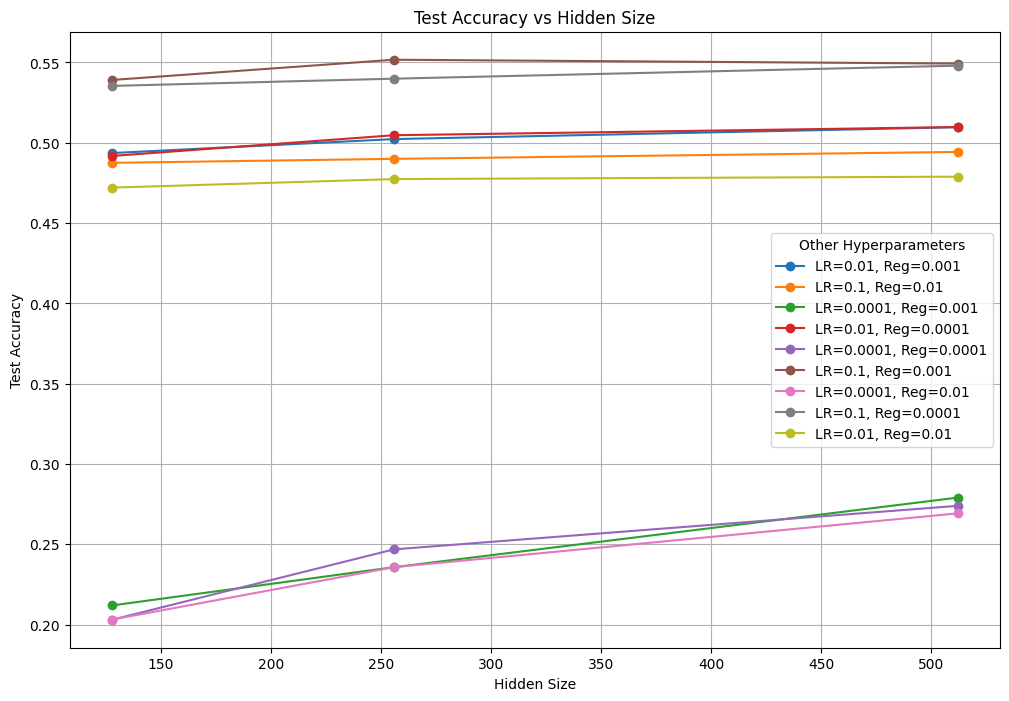

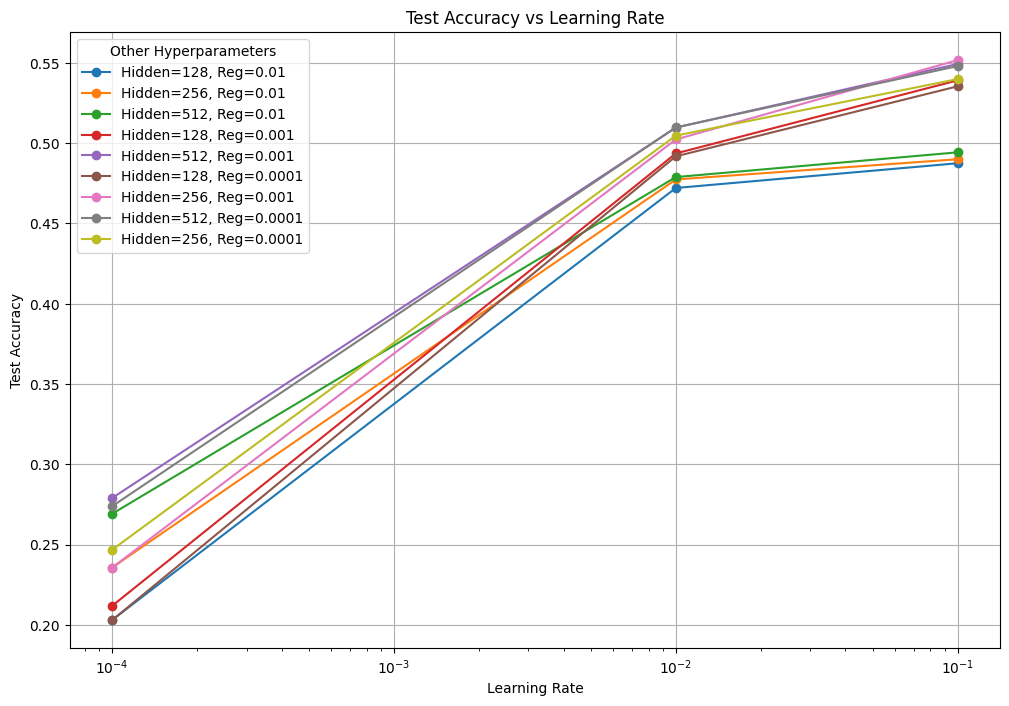

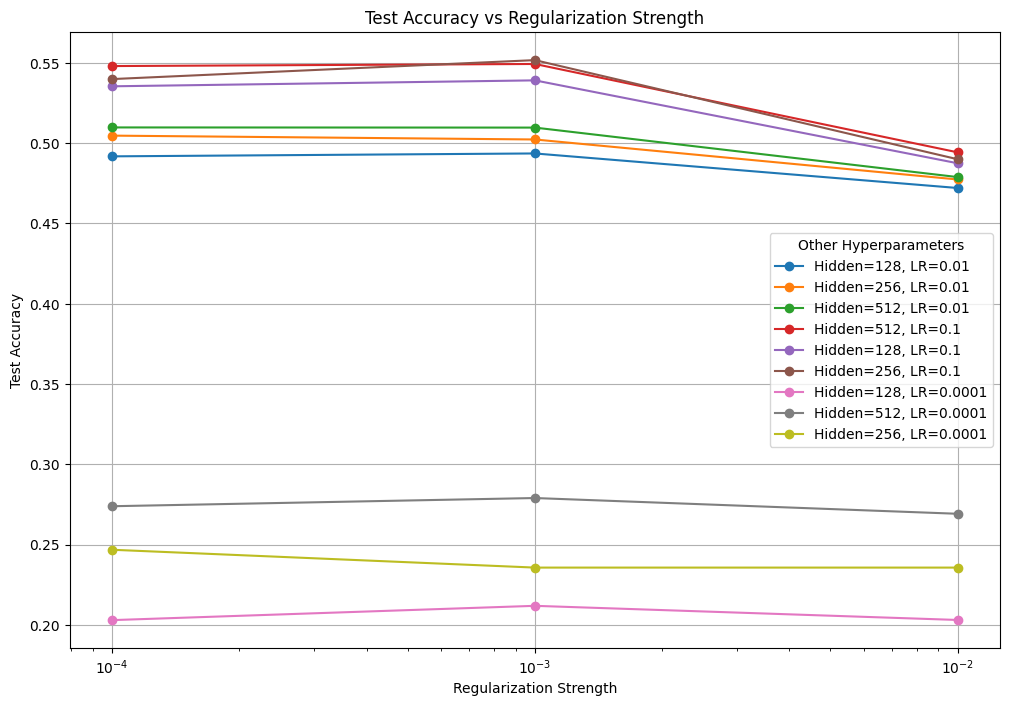

In [4]:
import matplotlib.pyplot as plt

hidden_sizes = [128, 256, 512]
learning_rates = [0.01, 0.1, 0.0001]
reg_lambdas = [0.0001, 0.001, 0.01]

# 收集数据
results = []
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for reg in reg_lambdas:
            model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
            trainer = Trainer(model, learning_rate=lr)
            trainer.train(X_train, y_train, X_val, y_val)
            test_acc = trainer.evaluate(X_test, y_test)
            results.append((hidden_size, lr, reg, test_acc))

# 图 1：Hidden Size
lr_reg_combos = list(set((result[1], result[2]) for result in results))
plt.figure(figsize=(12, 8))
for lr, reg in lr_reg_combos:
    data = [result for result in results if result[1] == lr and result[2] == reg]
    hidden_sizes_plot = [result[0] for result in data]
    test_accs_plot = [result[3] for result in data]
    sorted_data = sorted(zip(hidden_sizes_plot, test_accs_plot))
    hidden_sizes_plot, test_accs_plot = zip(*sorted_data)
    plt.plot(hidden_sizes_plot, test_accs_plot, marker='o', label=f'LR={lr}, Reg={reg}')
plt.title('Test Accuracy vs Hidden Size')
plt.xlabel('Hidden Size')
plt.ylabel('Test Accuracy')
plt.legend(title='Other Hyperparameters')
plt.grid(True)
plt.show()

# 图 2：Learning Rate
hidden_reg_combos = list(set((result[0], result[2]) for result in results))
plt.figure(figsize=(12, 8))
for hidden_size, reg in hidden_reg_combos:
    data = [result for result in results if result[0] == hidden_size and result[2] == reg]
    lrs_plot = [result[1] for result in data]
    test_accs_plot = [result[3] for result in data]
    sorted_data = sorted(zip(lrs_plot, test_accs_plot))
    lrs_plot, test_accs_plot = zip(*sorted_data)
    plt.plot(lrs_plot, test_accs_plot, marker='o', label=f'Hidden={hidden_size}, Reg={reg}')
plt.title('Test Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(title='Other Hyperparameters')
plt.grid(True)
plt.show()

# 图 3：Regularization Strength
hidden_lr_combos = list(set((result[0], result[1]) for result in results))
plt.figure(figsize=(12, 8))
for hidden_size, lr in hidden_lr_combos:
    data = [result for result in results if result[0] == hidden_size and result[1] == lr]
    regs_plot = [result[2] for result in data]
    test_accs_plot = [result[3] for result in data]
    sorted_data = sorted(zip(regs_plot, test_accs_plot))
    regs_plot, test_accs_plot = zip(*sorted_data)
    plt.plot(regs_plot, test_accs_plot, marker='o', label=f'Hidden={hidden_size}, LR={lr}')
plt.title('Test Accuracy vs Regularization Strength')
plt.xlabel('Regularization Strength')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(title='Other Hyperparameters')
plt.grid(True)
plt.show()